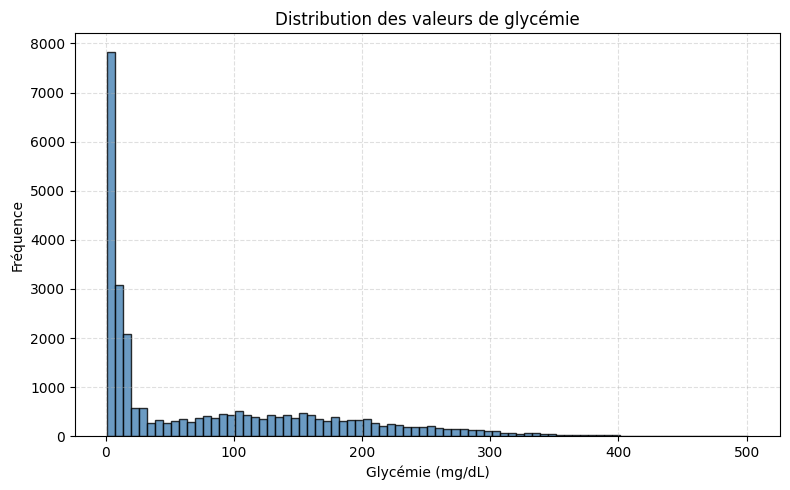

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_csv("diabetes_merged.csv", sep=",", header=0)
df.columns = ["date", "time", "code", "glucose", "source"]

# Convertir glucose en numérique
df["glucose"] = pd.to_numeric(df["glucose"], errors="coerce")
df = df.dropna(subset=["glucose"])

# Supprimer les valeurs aberrantes
df = df[df["glucose"] > 0]

# Tracer l'histogramme
plt.figure(figsize=(8, 5))
plt.hist(df["glucose"], bins=80, color="steelblue", edgecolor="black", alpha=0.8)

plt.title("Distribution des valeurs de glycémie")
plt.xlabel("Glycémie (mg/dL)")
plt.ylabel("Fréquence")
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

# Exporter l'image
plt.savefig("histogramme_glucose.png", dpi=300)


C:\Users\jonat\AppData\Local\Temp\ipykernel_10328\412287919.py:11: UserWarning: Parsing dates in %m-%d-%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")
C:\Users\jonat\AppData\Local\Temp\ipykernel_10328\412287919.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient["glucose_smooth"] = df_patient["glucose"].rolling(window=5, center=True).mean()


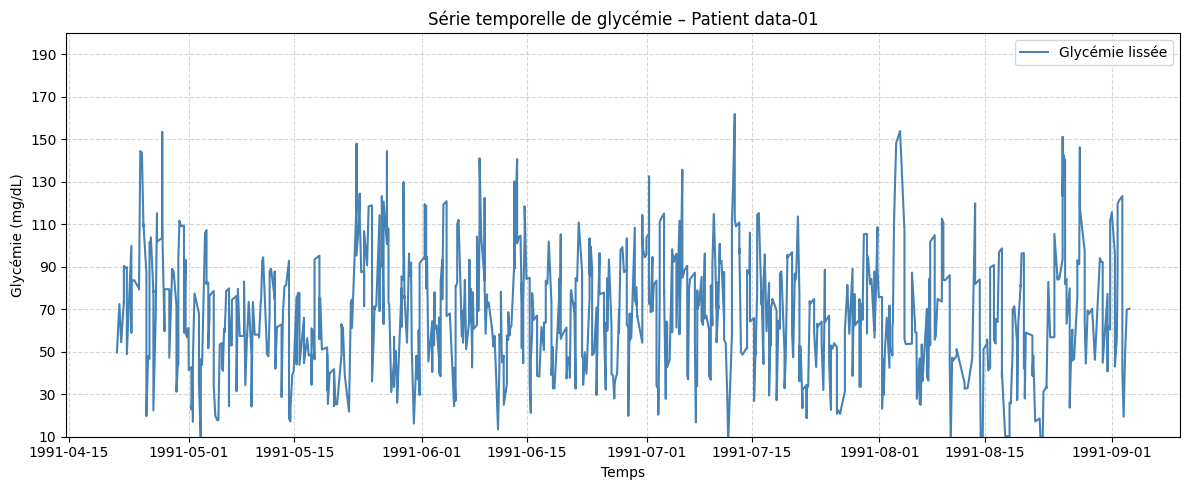

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_csv("diabetes_merged.csv", sep=",", header=0)

# Renommer les colonnes
df.columns = ["date", "time", "code", "glucose", "source"]

# Fusionner date + time
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")

# Supprimer les dates invalides
df = df.dropna(subset=["datetime"])

# Trier
df = df.sort_values("datetime")

# Filtrer le patient
df_patient = df[df["source"] == "data-01"]

# Lissage
df_patient["glucose_smooth"] = df_patient["glucose"].rolling(window=5, center=True).mean()

# Tracé
plt.figure(figsize=(12, 5))
plt.plot(df_patient["datetime"], df_patient["glucose_smooth"], 
         label="Glycémie lissée", color="steelblue")

plt.title("Série temporelle de glycémie – Patient data-01")
plt.xlabel("Temps")
plt.ylabel("Glycémie (mg/dL)")

plt.ylim(10, 200)
plt.yticks(range(10, 200, 20))
plt.tick_params(axis='y', labelsize=10)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_csv("diabetes_merged.csv", sep=",", header=0)
df.columns = ["date", "time", "code", "glucose", "source"]

# Fusionner date + time
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["datetime"])

# Convertir glucose en numérique
df["glucose"] = pd.to_numeric(df["glucose"], errors="coerce")

# Supprimer les valeurs invalides
df = df.dropna(subset=["glucose"])

# Supprimer les valeurs aberrantes
df = df[df["glucose"] > 0]

# Vérifier
print(df.dtypes)
print(df.head())



date                object
time                object
code                object
glucose            float64
source              object
datetime    datetime64[ns]
dtype: object
         date   time code  glucose   source            datetime
0  04-21-1991   9:09   58    100.0  data-01 1991-04-21 09:09:00
1  04-21-1991   9:09   33      9.0  data-01 1991-04-21 09:09:00
2  04-21-1991   9:09   34     13.0  data-01 1991-04-21 09:09:00
3  04-21-1991  17:08   62    119.0  data-01 1991-04-21 17:08:00
4  04-21-1991  17:08   33      7.0  data-01 1991-04-21 17:08:00


C:\Users\jonat\AppData\Local\Temp\ipykernel_10328\1451825060.py:9: UserWarning: Parsing dates in %m-%d-%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")


In [8]:
import pandas as pd
import numpy as np

# Charger le fichier
df = pd.read_csv("diabetes_merged.csv", sep=",", header=0)
df.columns = ["date", "time", "code", "glucose", "source"]

# Fusionner date + time
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["datetime"])

# Convertir glucose en numérique
df["glucose"] = pd.to_numeric(df["glucose"], errors="coerce")
df = df.dropna(subset=["glucose"])

# Supprimer les valeurs aberrantes
df = df[df["glucose"] > 0]

# Fonction de features
def compute_features(group):
    g = group["glucose"]
    return pd.Series({
        "mean_glucose": g.mean(),
        "median_glucose": g.median(),
        "cv": g.std() / g.mean() if g.mean() != 0 else np.nan,
        "amplitude": g.max() - g.min(),
        "pct_high": (g > 180).mean() * 100,
        "pct_low": (g < 70).mean() * 100
    })

# Calcul patient-level
df_features = df.groupby("source").apply(compute_features)
df_features.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10328\204960437.py:9: UserWarning: Parsing dates in %m-%d-%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")
C:\Users\jonat\AppData\Local\Temp\ipykernel_10328\204960437.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features = df.groupby("source").apply(compute_features)


,mean_glucose,median_glucose,cv,amplitude,pct_high,pct_low
source,,,,,,
data-01,71.264574,16.0,1.213192,342.0,15.358744,61.434978
data-02,101.141910,18.0,1.050718,389.0,27.586207,53.050398
data-03,73.996466,49.0,1.080920,302.0,12.014134,54.770318
data-04,84.571918,34.5,1.140397,364.0,21.232877,55.821918
data-05,87.191275,37.0,1.130588,392.0,20.134228,55.033557


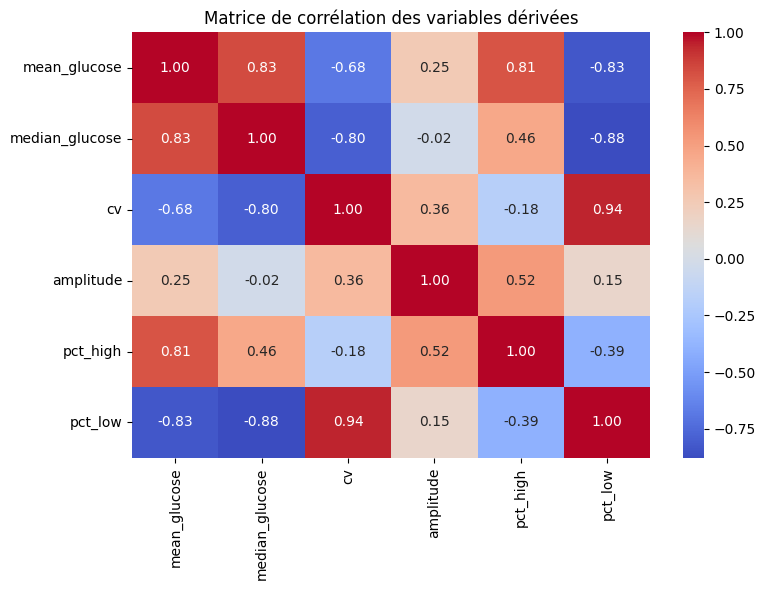

<Figure size 640x480 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matrice de corrélation des variables dérivées")
plt.tight_layout()
plt.show()
plt.savefig("correlation.png", dpi=300)

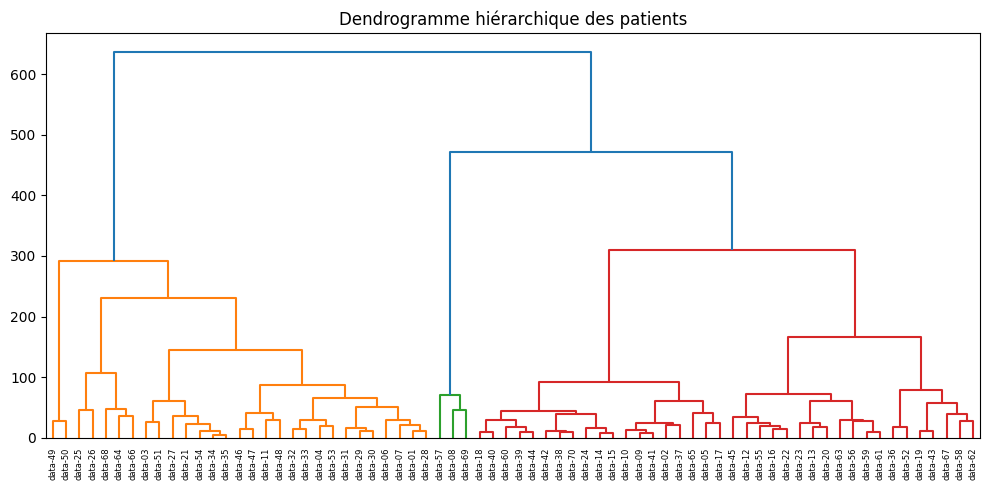

<Figure size 640x480 with 0 Axes>

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(df_features, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df_features.index, leaf_rotation=90)

plt.title("Dendrogramme hiérarchique des patients")
plt.tight_layout()
plt.show()
plt.savefig("dendrogramme.png", dpi=300)

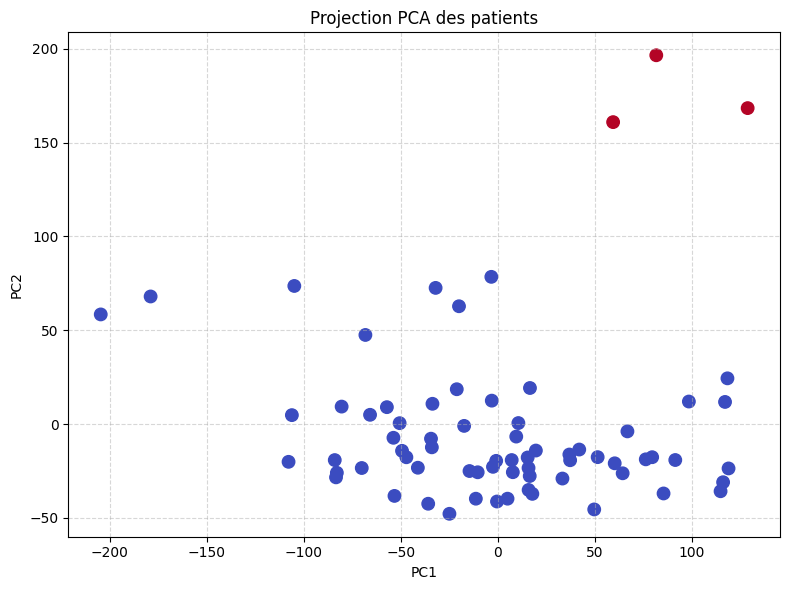

<Figure size 640x480 with 0 Axes>

In [13]:
df_features["severe"] = (df_features["median_glucose"] > 150).astype(int)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df_features.drop(columns=["severe"]))

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], 
            c=df_features["severe"], cmap="coolwarm", s=80)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA des patients")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.savefig("pca.png", dpi=300)